In [1]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np
from matplotlib import pyplot
%matplotlib inline
import TextCleaner as cleaner
import svm_model_generator as model_generator
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(500)

In [3]:
#Load Dataset

DATASET_DIR = '../../Dataset/big_spam_dataset.csv'

data = pd.read_csv(DATASET_DIR, encoding='cp1252')
data.drop('Unnamed: 0', inplace=True, axis=1)
data.head()

,Message_body,Label
0,"UpgrdCentre Orange customer, you may now claim...",Spam
1,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,Congrats! Nokia 3650 video camera phone is you...,Spam
3,URGENT! Your Mobile number has been awarded wi...,Spam
4,Someone has contacted our dating service and e...,Spam


In [4]:
# Create new features (Feature Engineering)

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text) - text.count(" ")), 3)

data['body_len'] = data['Message_body'].apply(lambda x: len(x) - x.count(' '))
data['punct%'] = data['Message_body'].apply(lambda x: count_punct(x))

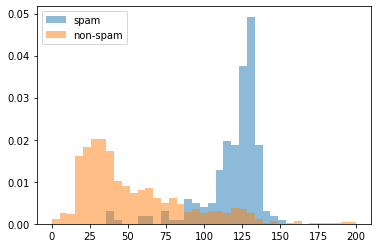

In [5]:
# Evaluate created features

bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['Label'] == 'Spam']['body_len'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data[data['Label'] == 'Non-Spam']['body_len'], bins, alpha=0.5, density=True, label='non-spam')
pyplot.legend(loc='upper left')
pyplot.show()

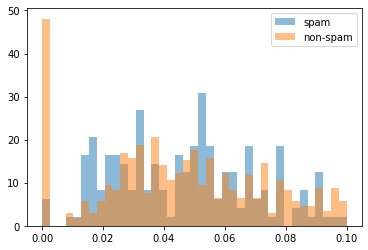

In [6]:
bins = np.linspace(0, 0.1, 40)

pyplot.hist(data[data['Label'] == 'Spam']['punct%'], bins, density=True, alpha=0.5, label='spam')
pyplot.hist(data[data['Label'] == 'Non-Spam']['punct%'], bins, alpha=0.5, density=True, label='non-spam')
pyplot.legend(loc='upper right')
pyplot.show()

In [7]:
# Text cleaning

clean_text = data['Message_body'].apply(lambda x: cleaner.clean_text(x, digit_opt='mask', 
                                                                        root_opt= 'stemming', 
                                                                        return_type='sentence'))

In [8]:
# TF-IDF Vectorizing
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(clean_text)
#X_tfidf_feat = pd.DataFrame(X_tfidf.toarray()) # use for when generated columns by feature engineering are not consider
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

# CountVectorizer
count_vect = CountVectorizer()
X_count = count_vect.fit_transform(clean_text)
#X_count_feat = pd.DataFrame(X_count.toarray()) # use for when generated columns by feature engineering are not consider
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

# N-grams
ngram_vect = CountVectorizer(ngram_range=(1,3))
X_ngram = ngram_vect.fit_transform(clean_text)
X_ngram_feat = pd.DataFrame(X_ngram.toarray())
#X_ngram_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_ngram.toarray())], axis=1)

In [9]:
# GridSearchCV

# GridSearch for TF-IDF

param = {'C' : [0.1, 1, 10, 100], #Kaç tane decision-tree build edileceği set edilir
         'kernel' : ['linear'],
         'degree' : [1, 2, 3, 4, 5],
         'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]} #Her bir tree ne kadar derin(boyu) olacağı belirlenir

grid_search_tfidf = model_generator.svm_gridSearchCV(X_tfidf_feat, data['Label'], param, 5)

# GridSearch for CountVectorizer

param = {'C' : [0.1, 1, 10, 100], #Kaç tane decision-tree build edileceği set edilir
         'kernel' : ['linear'],
         'degree' : [1, 2, 3, 4, 5],
         'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]} #Her bir tree ne kadar derin(boyu) olacağı belirlenir

grid_search_count = model_generator.svm_gridSearchCV(X_count_feat, data['Label'], param, 5)

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [10]:
# GridSearch for N-grams

# param = {'C' : [0.1, 1, 10, 100], #Kaç tane decision-tree build edileceği set edilir
#        'kernel' : ['linear'],
#        'degree' : [1, 2, 3, 4, 5],
#        'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]} #Her bir tree ne kadar derin(boyu) olacağı belirlenir

# grid_search_ngram = model_generator.svm_gridSearchCV(X_ngram_feat, data['Label'], param, 5)

In [19]:
# Best scores for TF-IDF GridSeacrh 

pd.DataFrame(grid_search_tfidf.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
31,6.801498,0.686079,0.121551,0.007174,1,2,0.1,linear,"{'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': ...",0.986175,0.97235,0.958333,0.967593,0.962963,0.969483,0.009563,1
36,8.194315,1.703932,0.134422,0.040251,1,3,0.1,linear,"{'C': 1, 'degree': 3, 'gamma': 0.1, 'kernel': ...",0.986175,0.97235,0.958333,0.967593,0.962963,0.969483,0.009563,1
42,6.508283,0.687111,0.116228,0.003135,1,4,0.01,linear,"{'C': 1, 'degree': 4, 'gamma': 0.01, 'kernel':...",0.986175,0.97235,0.958333,0.967593,0.962963,0.969483,0.009563,1
41,6.584471,0.652341,0.112590,0.003174,1,4,0.1,linear,"{'C': 1, 'degree': 4, 'gamma': 0.1, 'kernel': ...",0.986175,0.97235,0.958333,0.967593,0.962963,0.969483,0.009563,1
40,6.562274,0.678876,0.122222,0.008335,1,4,1,linear,"{'C': 1, 'degree': 4, 'gamma': 1, 'kernel': 'l...",0.986175,0.97235,0.958333,0.967593,0.962963,0.969483,0.009563,1


In [22]:
# Best scores for Count Vectorizer GridSeacrh 

pd.DataFrame(grid_search_count.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
50,0.797124,0.067444,0.121512,0.009980,10,1,1,linear,"{'C': 10, 'degree': 1, 'gamma': 1, 'kernel': '...",0.986175,0.976959,0.958333,0.972222,0.958333,0.970405,0.01083,1
75,0.959020,0.074170,0.141052,0.016797,100,1,1,linear,"{'C': 100, 'degree': 1, 'gamma': 1, 'kernel': ...",0.986175,0.976959,0.958333,0.972222,0.958333,0.970405,0.01083,1
73,0.879057,0.055928,0.138025,0.009501,10,5,0.001,linear,"{'C': 10, 'degree': 5, 'gamma': 0.001, 'kernel...",0.986175,0.976959,0.958333,0.972222,0.958333,0.970405,0.01083,1
72,0.904631,0.062005,0.138370,0.007143,10,5,0.01,linear,"{'C': 10, 'degree': 5, 'gamma': 0.01, 'kernel'...",0.986175,0.976959,0.958333,0.972222,0.958333,0.970405,0.01083,1
71,1.102877,0.118328,0.166071,0.039118,10,5,0.1,linear,"{'C': 10, 'degree': 5, 'gamma': 0.1, 'kernel':...",0.986175,0.976959,0.958333,0.972222,0.958333,0.970405,0.01083,1


/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error 

In [13]:
# Best scores for N-Gram GridSeacrh 

# pd.DataFrame(grid_search_ngram.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

In [14]:
# Split Train and Test sets

# No feature Engineering
# X_train, X_test, y_train, y_test = train_test_split(data['Message_body'], data['Label'], test_size=0.2)

#Split with Feature Engineered features
X_feat_train, X_feat_test, y_feat_train, y_feat_test = train_test_split(data[['Message_body', 'body_len', 'punct%']],
                                                                        data['Label'], test_size=0.2)  

X_train_processed = X_feat_train['Message_body'].apply(lambda x: cleaner.clean_text(x, digit_opt='mask', 
                                                                  root_opt= 'stemming', 
                                                                  return_type='sentence'))

X_test_processed = X_feat_test['Message_body'].apply(lambda x: cleaner.clean_text(x, digit_opt='mask', 
                                                                root_opt= 'stemming', 
                                                                return_type='sentence'))

In [15]:
# TF-IDF - base 

tfidf_vect = TfidfVectorizer()
tfidf_vect_fit = tfidf_vect.fit(X_train_processed)

tfidf_train = tfidf_vect_fit.transform(X_train_processed)
tfidf_test = tfidf_vect_fit.transform(X_test_processed)

X_train_tfidf_vect = pd.concat([X_feat_train[['body_len', 'punct%']].reset_index(drop=True), 
                               pd.DataFrame(tfidf_train.toarray())], axis=1)

X_test_tfidf_vect = pd.concat([X_feat_test[['body_len', 'punct%']].reset_index(drop=True), 
                               pd.DataFrame(tfidf_test.toarray())], axis=1)

# CountVectorizer - base
count_vect = CountVectorizer()
X_count_vect_fit = count_vect.fit(X_train_processed)

count_train = X_count_vect_fit.transform(X_train_processed)
count_test = X_count_vect_fit.transform(X_test_processed)

X_train_count_vect = pd.concat([X_feat_train[['body_len', 'punct%']].reset_index(drop=True),
                                pd.DataFrame(count_train.toarray())], axis=1)

X_test_count_vect = pd.concat([X_feat_test[['body_len', 'punct%']].reset_index(drop=True),
                               pd.DataFrame(count_test.toarray())], axis=1)

# N-Gram Vectorizer

ngram_vect = CountVectorizer(ngram_range= (1,3))
X_ngram_vec_fit = ngram_vect.fit(X_train_processed)

ngram_train = X_ngram_vec_fit.transform(X_train_processed)
ngram_test = X_ngram_vec_fit.transform(X_test_processed)

X_train_ngram_vect = pd.concat([X_feat_train[['body_len', 'punct%']].reset_index(drop=True),
                                pd.DataFrame(ngram_train.toarray())], axis=1)

X_test_ngram_vect = pd.concat([X_feat_test[['body_len', 'punct%']].reset_index(drop=True),
                               pd.DataFrame(ngram_test.toarray())], axis=1)

In [23]:
# The selected parameters are based on GridSearchCV as the parameter that gives the best results.

# TF-IDF Holdout

svm_model, precision, recall, accuracy = model_generator.svm_holdout(X_train_tfidf_vect, 
                                                                     X_test_tfidf_vect, 
                                                                     y_feat_train, y_feat_test, 
                                                                     c_ = 1,
                                                                     degree_ = 2,
                                                                     gamma_ = 0.1)


print('Precision: {} / Recall: {} / Acuracy: {}'.format(round(precision, 3),
                                                       round(recall, 3),
                                                       accuracy))

# Count-Vect Holdout

svm_model, precision, recall, accuracy = model_generator.svm_holdout(X_train_count_vect, 
                                                                     X_test_count_vect, 
                                                                     y_feat_train, y_feat_test,
                                                                     c_ = 10,
                                                                     degree_ = 1,
                                                                     gamma_ = 1)


print('Precision: {} / Recall: {} / Acuracy: {}'.format(round(precision, 3),
                                                       round(recall, 3),
                                                       accuracy))

# N-Gram-Vect Holdout

svm_model, precision, recall, accuracy = model_generator.svm_holdout(X_train_ngram_vect, 
                                                                     X_test_ngram_vect, 
                                                                     y_feat_train, y_feat_test,
                                                                     c_ = 0.1,
                                                                     degree_ = 1,
                                                                     gamma_ = 1)


print('Precision: {} / Recall: {} / Acuracy: {}'.format(round(precision, 3),
                                                       round(recall, 3),
                                                       accuracy))

/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Precision: 0.943 / Recall: 0.892 / Acuracy: 0.972


/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Precision: 0.97 / Recall: 0.865 / Acuracy: 0.972


/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Precision: 0.941 / Recall: 0.865 / Acuracy: 0.968


In [20]:
print(grid_search_count.best_params_)
print(grid_search_count.best_params_['degree'])
print(grid_search_count.best_params_['gamma'])

{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'linear'}
1
1


In [21]:
print(grid_search_tfidf.best_params_)
print(grid_search_tfidf.best_params_['degree'])
print(grid_search_tfidf.best_params_['gamma'])

{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'linear'}
1
1
